In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import math as m

In [ ]:
# Here assume AE = 1
pi = tf.constant(m.pi)
f0 = 0
inf_s = np.sqrt(np.finfo(np.float32).eps)
learning_rate = 0.02
training_steps = 20000
batch_size = 100
display_step = 500
x_min = 0
x_max = 1
Num_eval = 20
interval = (x_max-x_min)/(Num_eval-1)
#(x_max-x_min)/Num_eval
# Network Parameters
n_input = 1     # input layer number of neurons
n_hidden_1 = 128 # 1st layer number of neurons
#n_hidden_2 = 128 # 2nd layer number of neurons
n_output = 1    # output layer number of neurons
weights = {
'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
#'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
'out': tf.Variable(tf.random.normal([n_hidden_1, n_output]))
}
biases = {
'b1': tf.Variable(tf.random.normal([n_hidden_1])),
#'b2': tf.Variable(tf.random.normal([n_hidden_2])),
'out': tf.Variable(tf.random.normal([n_output]))
}
# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
# Derivate based on finite difference in tensorflow
def grad(dx,w):
  dx1 = dx[0:Num_eval]
  dx1 = tf.reshape(dx1,Num_eval)
  dx2 = dx[2:Num_eval+2]
  dx2 = tf.reshape(dx2,Num_eval)
  dx_diff = dx1 + dx2
  w1 = tf.concat([w[0:1],w], 0)
  w1 = tf.reshape(w1,Num_eval+1)
  w2 = tf.concat([w,w[Num_eval-1:Num_eval]],0)
  w2 = tf.reshape(w2,Num_eval+1)
  dw = w2[1:] - w1[:-1]
  dwdx = dw/dx_diff
  return dwdx

In [ ]:
# Create model
def multilayer_perceptron(x):
  x = np.array([[[x]]],  dtype='float32')
  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  layer_1 = tf.nn.sigmoid(layer_1)
  #layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  #layer_2 = tf.nn.sigmoid(layer_2)
  output = tf.matmul(layer_1, weights['out']) + biases['out']
  return output

# Universal Approximator
def g(x):
  return x*2.718281828**(-x)*multilayer_perceptron(x) + f0
# Given EDO
def f(x):
  #return 1
  return x
# Custom loss function to approximate the derivatives
def custom_loss():
  summation = []
  dx = []
  dx.append(0)
  w = []
  for x in np.linspace(0,1,Num_eval):
    w.append(g(x))
    dx.append(interval)
  dx.append(0)
  dw1 = grad(dx,w)
  dw2 = grad(dx,dw1)
  #dw3 = grad(dx,dw2)
  #dw4 = grad(dx,dw3)

  ind = -1
  for x in np.linspace(0,1,Num_eval):
    ind += 1
    d2NN2 = dw2[ind]
    #d4NN2 = w_grad4[ind]
    summation.append((d2NN2 + f(x))**2)
  #summation.append((100*dw1[0])**2)
  summation.append((100*(dw1[Num_eval-1]))**2)
  return tf.sqrt(tf.reduce_mean(tf.abs(summation)))

In [ ]:
def train_step():
  with tf.GradientTape() as tape:
    loss = custom_loss()
  trainable_variables=list(weights.values())+list(biases.values())
  gradients = tape.gradient(loss, trainable_variables)
  optimizer.apply_gradients(zip(gradients, trainable_variables))


In [ ]:
# Test Code
with tf.GradientTape() as tape:
    loss = custom_loss()
trainable_variables=list(weights.values())+list(biases.values())
gradients = tape.gradient(loss, trainable_variables)
print(loss)
print(gradients)

In [ ]:
for i in range(training_steps):
  train_step()
  if i % display_step == 0:
    print("loss: %f " % (custom_loss()))

loss: 11.693498 
loss: 0.214475 
loss: 0.202146 
loss: 0.194579 
loss: 0.188000 
loss: 0.183044 
loss: 0.178635 
loss: 0.176425 
loss: 0.172768 
loss: 0.170538 
loss: 0.169408 
loss: 0.166719 
loss: 0.165125 
loss: 0.163051 
loss: 0.162255 
loss: 0.161665 
loss: 0.159506 
loss: 0.157486 
loss: 0.156643 
loss: 0.155879 
loss: 0.154771 
loss: 0.153587 
loss: 0.153241 
loss: 0.150833 
loss: 0.150081 
loss: 0.147375 
loss: 0.148013 
loss: 0.145988 
loss: 0.145777 
loss: 0.144325 
loss: 0.142881 
loss: 0.142181 
loss: 0.139601 
loss: 0.140732 
loss: 0.138795 
loss: 0.138105 
loss: 0.137369 
loss: 0.136623 
loss: 0.135444 
loss: 0.135210 


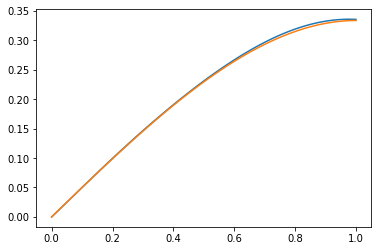

In [ ]:
# True Solution (found analitically) for function f=x, with the assumption of C = 1, P = 1, and L = 1
def true_solution(x):
  #return -x**3/6+3*x/2
  return 1*(-x**3/6+x/2)
  #return -(x**2)/2+x
X = np.linspace(0, 1, 100)
result = []
for i in X:
  result.append(g(i).numpy()[0][0][0])
S = true_solution(X)
plt.plot(X, result)
plt.plot(X, S)
plt.show()

In [ ]:
print("NN=",result)
print("Exact=",S)

NN= [0.0, 0.0050185, 0.010054798, 0.015105064, 0.02016567, 0.025233302, 0.030304752, 0.03537709, 0.04044745, 0.04551339, 0.050572347, 0.055622205, 0.06066087, 0.065686345, 0.07069688, 0.07569095, 0.080666795, 0.08562318, 0.09055864, 0.09547237, 0.100362994, 0.105229296, 0.11007058, 0.114885986, 0.11967449, 0.12443583, 0.1291688, 0.1338727, 0.13854736, 0.1431915, 0.14780532, 0.15238759, 0.15693803, 0.16145606, 0.1659408, 0.17039202, 0.17480908, 0.1791914, 0.18353803, 0.18784887, 0.19212247, 0.19635864, 0.20055667, 0.20471564, 0.20883496, 0.21291298, 0.21694973, 0.22094378, 0.2248942, 0.22879995, 0.23265988, 0.23647344, 0.24023814, 0.24395455, 0.24761993, 0.25123355, 0.25479424, 0.25830007, 0.26175016, 0.26514268, 0.2684761, 0.27174917, 0.27496, 0.27810758, 0.28118956, 0.28420445, 0.28715074, 0.29002696, 0.2928309, 0.295561, 0.29821596, 0.30079338, 0.3032923, 0.30571043, 0.30804583, 0.31029767, 0.31246334, 0.3145417, 0.316531, 0.31842917, 0.32023534, 0.32194754, 0.3235643, 0.32508406, 0.

In [ ]:
summation = []
dx = []
dx.append(0)
w = []
for x in np.linspace(0,1,20):
  w.append(g(x))
  dx.append(0.05)
dx.append(0)
dw1 = grad(dx,w)
dw2 = grad(dx,dw1)
print(dw1)
print(dw2)
print(np.linspace(0,1,20))

In [ ]:
x = tf.Variable(0.8)

with tf.GradientTape() as tape:
  y = g(x)

dy_dx = tape.gradient(y, x)
dy_dx.numpy()

0.5569379

In [ ]:
with tf.GradientTape() as t2:
  with tf.GradientTape() as t1:
    #y = tf.tanh(x)
    y = g(x)
         
  der1 = t1.gradient(y, x)
der2 = t2.gradient(der1, x)

print(der1)
print(der2)

tf.Tensor(0.5569379, shape=(), dtype=float32)
None
